<a href="https://colab.research.google.com/github/AndoorAlanD/DA6401-Assignment-1/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import wandb
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wandb.login() #1ffc33d77af0fd022201ec32b81cd0e92cd75821

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alandandoor (alandandoor-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
#loading the dataset
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
class_names= ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


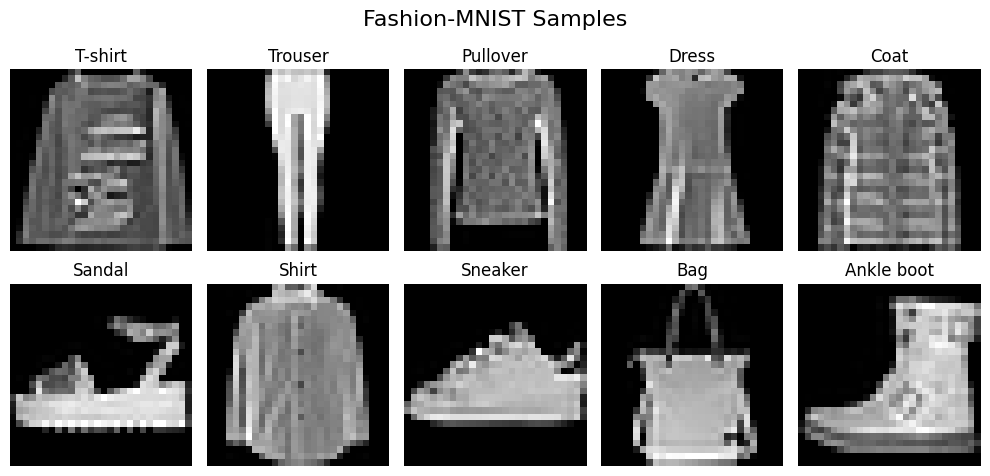

In [4]:
sample_images = []
for class_idx in range(10):
    class_indices = np.where(y_train == class_idx)[0]
    sample_index = np.random.choice(class_indices)
    sample_images.append((X_train[sample_index].reshape(28, 28), class_names[class_idx]))

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Fashion-MNIST Samples", fontsize=16)

for i, ax in enumerate(axes.flat):
    img, label = sample_images[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [5]:
def train():
    wandb.init()
    config = wandb.config

    for step in range(config.step):

      sample_images = []
      for class_idx in range(10):
          class_indices = np.where(y_train == class_idx)[0]
          sample_index = np.random.choice(class_indices)
          sample_images.append((X_train[sample_index].reshape(28, 28), class_names[class_idx]))

      wandb_images = [wandb.Image(img, caption=f"Class {label}") for img, label in sample_images]
      wandb.log({"Different_Class_images": wandb_images, "step": step})
    wandb.finish()


sweep_config = {
    "method": "grid",
    'name' : 'Image',
    "metric": {"name": "val_accuracy", "goal": "maximize"},
    "parameters": {
        "step": {"values": [1, 2, 3]},
        "index": {"min": 0, "max": 9}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")
wandb.agent(sweep_id, function=train, count=50)

Create sweep with ID: 1w6pi2xk
Sweep URL: https://wandb.ai/alandandoor-iit-madras/DL_A1/sweeps/1w6pi2xk


wandb: Agent Starting Run: p3091wjc with config:
wandb: 	index: 0
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: rcuj1nn1 with config:
wandb: 	index: 0
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: hjqbep3l with config:
wandb: 	index: 0
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: azqd8q2h with config:
wandb: 	index: 1
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: 4kkj2x65 with config:
wandb: 	index: 1
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: 62inag9i with config:
wandb: 	index: 1
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: 7evyqg3e with config:
wandb: 	index: 2
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: pp8w62k2 with config:
wandb: 	index: 2
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: mc47e4al with config:
wandb: 	index: 2
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: ajqs4e3e with config:
wandb: 	index: 3
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: 8flrt99u with config:
wandb: 	index: 3
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: wskflbbc with config:
wandb: 	index: 3
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: p08646bw with config:
wandb: 	index: 4
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: 8kxih03v with config:
wandb: 	index: 4
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: z09e81de with config:
wandb: 	index: 4
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: xbohzufd with config:
wandb: 	index: 5
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: 7rgt67q3 with config:
wandb: 	index: 5
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: mj4rc74z with config:
wandb: 	index: 5
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: lcjunoti with config:
wandb: 	index: 6
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: g72dts21 with config:
wandb: 	index: 6
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: ctnm2n4y with config:
wandb: 	index: 6
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: 5dold2ph with config:
wandb: 	index: 7
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: syrm7ooc with config:
wandb: 	index: 7
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: gsywuol2 with config:
wandb: 	index: 7
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: 5j9snk2b with config:
wandb: 	index: 8
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: y3m301r3 with config:
wandb: 	index: 8
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: vfa81ne0 with config:
wandb: 	index: 8
wandb: 	step: 3


step,▁▅█
step,2


wandb: Agent Starting Run: 2lgq8pwc with config:
wandb: 	index: 9
wandb: 	step: 1


step,▁
step,0


wandb: Agent Starting Run: oflimbf3 with config:
wandb: 	index: 9
wandb: 	step: 2


step,▁█
step,1


wandb: Agent Starting Run: tdwe4cim with config:
wandb: 	index: 9
wandb: 	step: 3


step,▁▅█
step,2


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.
